## Import Dataset

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('Titanic-Dataset.csv')

# shape of the dataset
print("Shape of the dataset:",df.shape)


Shape of the dataset: (891, 12)


### Explore Basic Info

In [20]:
df.head() # Display the first few rows of the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
df.info()  # Get information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Handle Missing Values

In [22]:
df.isnull().sum()  # Check for missing values in the dataset

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
df['Age'] = df['Age'].fillna(df['Age'].median())  # Fill missing Age values with median


In [24]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])  # Fill missing Embarked values with mode

In [25]:
df.drop('Cabin', axis=1, inplace=True)  # Drop the 'cabin' column as it has too many missing values

In [26]:
# Confirming the changes
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Convert Categorical Features into Numerical (Encoding)

In [27]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1}) # Convert 'Sex' to numerical values using Label Encoding

In [28]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True) # Convert 'Embarked' to numerical values using One-Hot Encoding

In [29]:
df.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True) # Drop columns that won't be used in the model

## Exploratory Data Analysis (EDA)

### Summary statistics

In [30]:
df.describe()  # Get a statistical summary of the dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
# Median (not shown in descriptive statistics)
print("Median Values:")
df.median(numeric_only=True)

Median Values:


Survived       0.0000
Pclass         3.0000
Sex            0.0000
Age           28.0000
SibSp          0.0000
Parch          0.0000
Fare          14.4542
Embarked_Q     0.0000
Embarked_S     1.0000
dtype: float64

### Histograms and boxplots

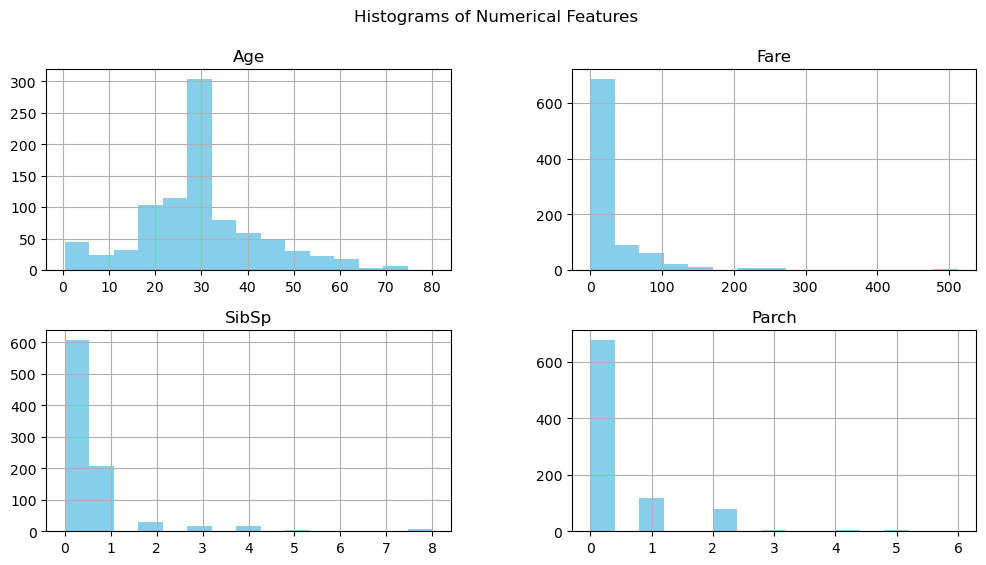

In [33]:
# Visualizing the distribution of numerical features (Histograms)
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']

df[num_cols].hist(bins=15, figsize=(12, 6), color='skyblue')
plt.suptitle('Histograms of Numerical Features')
plt.show()


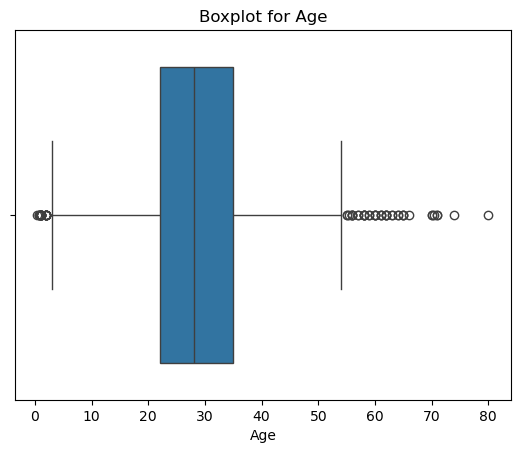

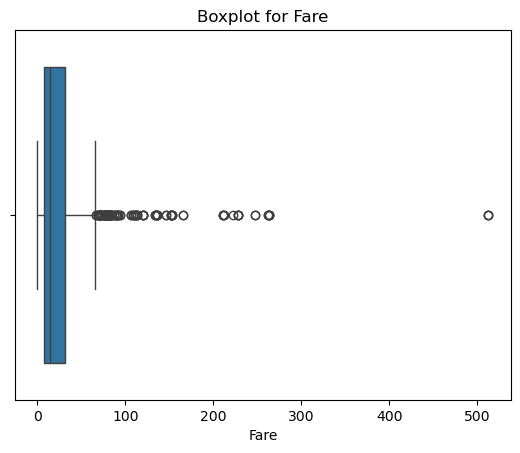

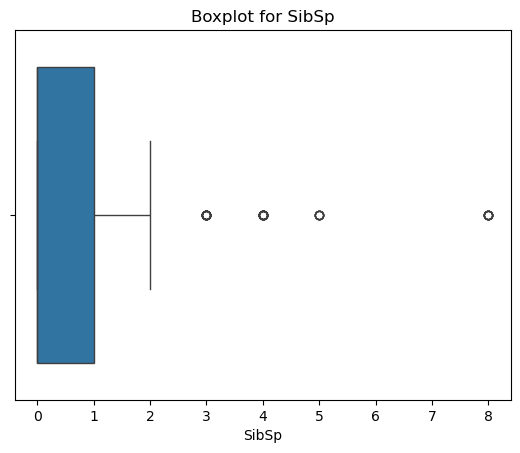

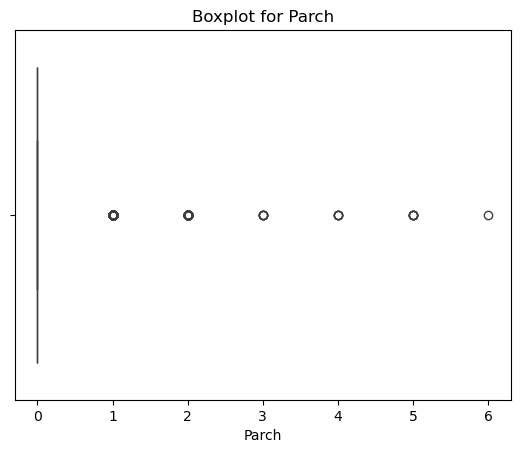

In [35]:
# Box plots (to identify outliers)

for col in num_cols:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()


### Pairplot and correlation matrix

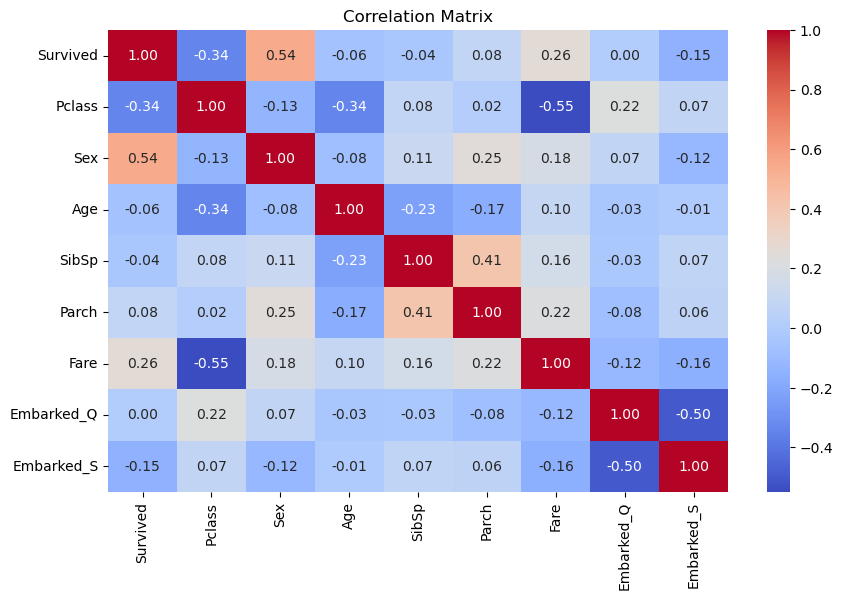

In [36]:
# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

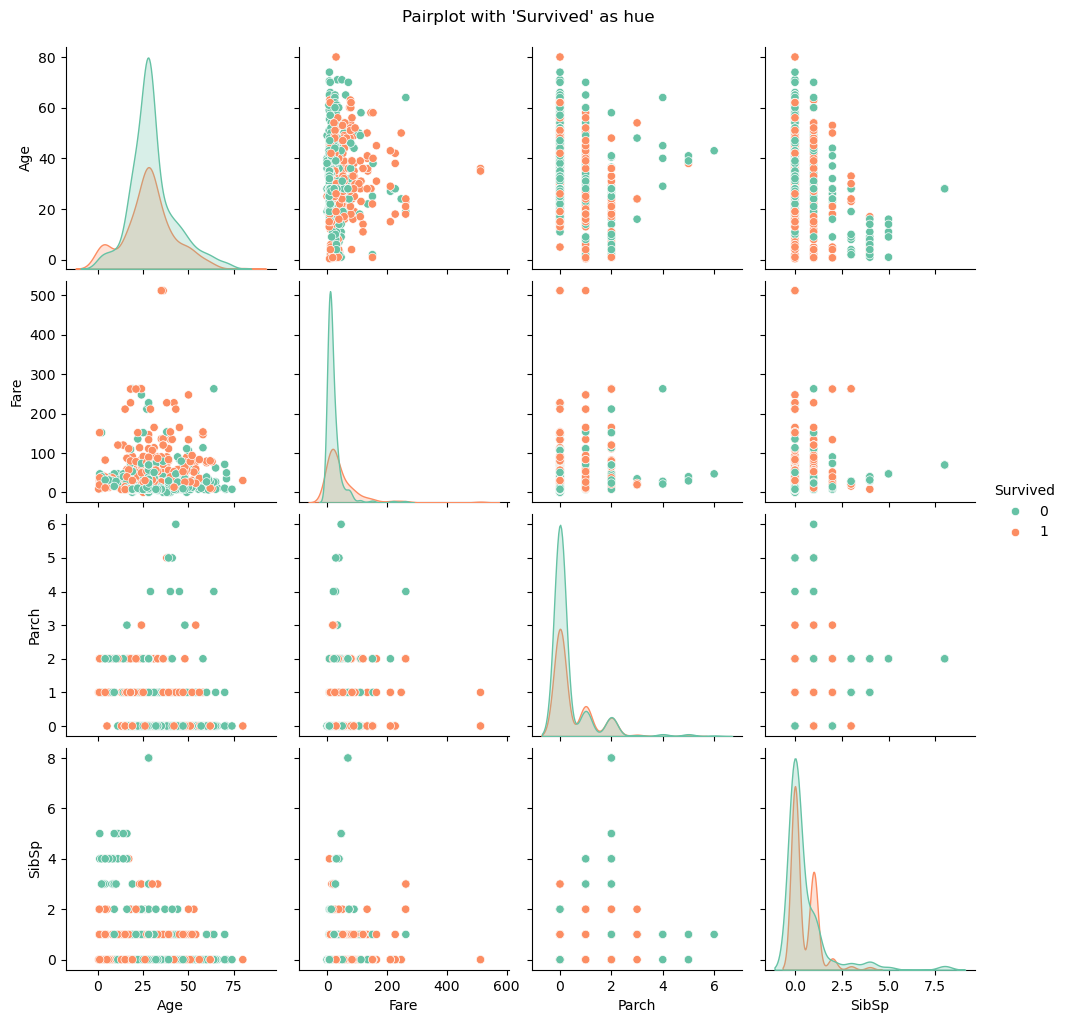

In [37]:
# Pairplot to visualize relationships between features
sns.pairplot(df[['Age', 'Fare', 'Parch', 'SibSp', 'Survived']], hue='Survived', palette='Set2')
plt.suptitle("Pairplot with 'Survived' as hue", y=1.02)
plt.show()


### Pattern/anomaly detection

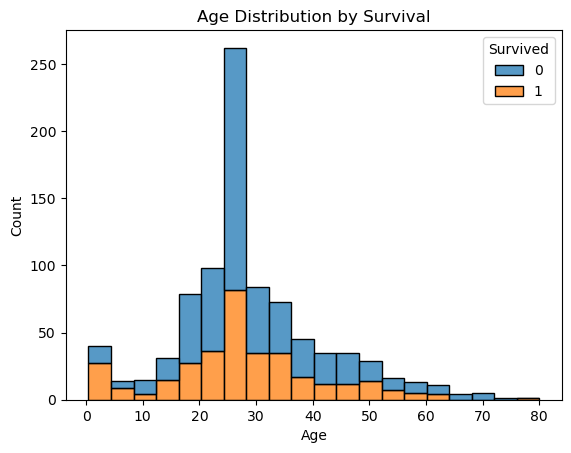

In [38]:
# Age vs Survival
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', bins=20)
plt.title("Age Distribution by Survival")
plt.show()


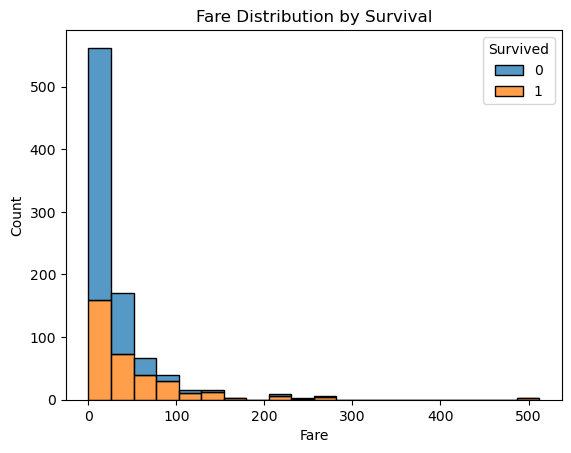

In [39]:
# Fare vs Survival
sns.histplot(data=df, x='Fare', hue='Survived', multiple='stack', bins=20)
plt.title("Fare Distribution by Survival")
plt.show()

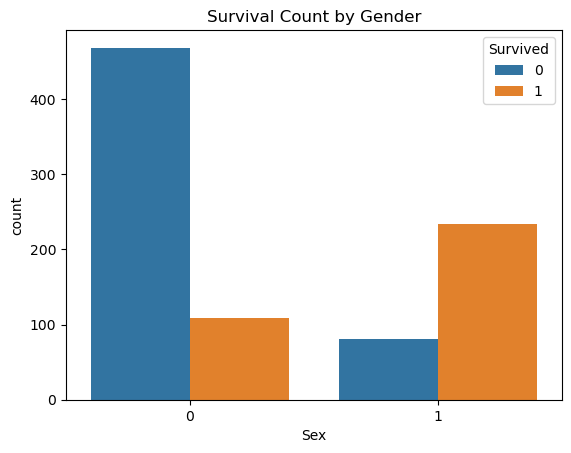

In [42]:
# Sex vs Survival
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival Count by Gender")
plt.show()


### Visual-based inferences

| Feature         | Visual Insight                                  | Possible Inference                        |
| --------------- | ----------------------------------------------- | ----------------------------------------- |
| **Sex**         | Women had higher survival                       | Gender may be an important predictor.     |
| **Fare**        | Survivors paid more on average                  | Higher class → better chance of survival. |
| **Age**         | Some young children survived more               | Age group could influence survival rate.  |
| **SibSp/Parch** | People with family onboard showed mixed results | May help but only up to a certain number. |
